In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math#
#import uproot
#from b2plot import hist
import b2plot as bp
import ROOT
#from root_pandas import read_root

import seaborn as sns
try:
    #plt.style.use('belle2')
    plt.style.use('belle2_serif')
    #plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
    
print(plt.style.available)
px = 1/plt.rcParams['figure.dpi']

For optimal usage set `plt.style.use('belle2')`
Welcome to JupyROOT 6.24/06
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_serif', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
def Draw(option=None,loc=None,var_name=None, var_unit=None,file='file', tree='tree', figname='name',base_filter=None, true_filter=None, false_filter=None, add_t_filter=None, add_f_filter=None, bins=None):
    tree=tree
    #base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55) ' 
    var_name=var_name
    #var_name["D0_M"]="M(D^0)"

    var_unit=var_unit
    #var_unit["D0_M"]="GeV/c^2"

    var=list(var_name.keys())
    print(var)
     
    if loc=='home':
        file = "/home/jykim/storage/nas" + file[27:]
    elif loc=='lab':
        file = "/home/jykim/nas" + file[21:]        
    else:
        file = file
        
        
    base_filter = base_filter
    true_filter = base_filter + true_filter
    false_filter = base_filter + false_filter
    
    if add_t_filter != None:
        true_filter = true_filter + add_t_filter
    elif add_f_filter != None:
        false_filter = false_filter + add_f_filter
    else:
        pass
        
        
    '''
    if vector == 'omega':
        base_filter += ' && ( abs(Omega_M- 0.78265) < 0.015 )'
    elif vector == 'phi':
        base_filter += ' && ( abs(Phi_M- 1.0195) < 0.011 )'
    elif vector == 'rho':
        base_filter += ' && ( abs(Rho_M- 0.77526) < 0.150 )'
    elif vector == 'antiKstar':
        base_filter += ' && ( abs(antiKstar_M- 0.89555) < 0.06 )'
    '''

    '''
    if vector == 'omega':
        plot_title = r"$\omega$ mode"
    elif vector == 'phi':
        plot_title = r"$\phi$ mode"
    elif vector == 'rho':
        plot_title = r"$\rho^0$ mode"
    elif vector == 'antiKstar':
        plot_title = r"$\bar{K}^{*0}$ mode"
    '''


    ROOT_df_start = ROOT.RDataFrame(tree, file)
    # Compute new variable

        

    
    ROOT_df       = ROOT_df_start.Filter(base_filter)
    ROOT_df_true  = ROOT_df_start.Filter(true_filter)                        
    ROOT_df_false = ROOT_df_start.Filter(false_filter)

    col_dict       = ROOT_df.AsNumpy(var)    
    col_dict_true  = ROOT_df_true.AsNumpy(var)
    col_dict_false = ROOT_df_false.AsNumpy(var)

    pd_df       = pd.DataFrame(col_dict)
    pd_df_true  = pd.DataFrame(col_dict_true)
    pd_df_false = pd.DataFrame(col_dict_false)  

    pd_df['class'] = 'all'
    pd_df_true['class'] = 'true'
    pd_df_false['class'] = 'false' 
    
    print('# of false is ' + str(pd_df_false.shape[0]) )

    px = 1/plt.rcParams['figure.dpi']
    plt.figure(figsize=(576*px, 396*px))
    
    for i in var:
        

        #plt.hist(pd_df[i], label=r'all',bins=bins,  histtype='step') 
        #plt.hist(pd_df_true[i], label=r'true',bins=bins,  histtype='step') 
        plt.hist(pd_df_false[i], label=r'bkg',bins=bins,  histtype='step') 
        

        #bp.hist(pd_df[i], label=r'all',bins=bins) 
        #bp.hist(pd_df_true[i], label=r'true',bins=bins) 
        #bp.hist(pd_df_false[i], label=r'false',bins=bins) 
        
        ax = plt.gca()
        ax.set_xlim(pd_df[i].min(), pd_df[i].max())
        
        if i in var:
            if var_unit[i]=="":
                xlabel = "$" + var_name[i] + "$"
            else:    
                xlabel = "$" + var_name[i] + "$ $[" + var_unit[i] + "]$"
            ax.set_xlabel(xlabel)            
            x_axis = ax.get_xbound()
            width = (x_axis[1] - x_axis[0])/bins  
            print("one bin's size is " + str(width))
            ax.set_ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + var_unit[i] + ' )$')                                      
        else:
            xlabel = i
            ax.set_xlabel(xlabel)            
            x_axis = ax.get_xbound()
            width = (x_axis[1] - x_axis[0])/bins
            ax.set_ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + ' )$')
            #ax.set_ylabel('Entries')                
        
        #bp.stacked(pd_merge_df, col=i, by='class', bins=100, color = sns.cubehelix_palette(8, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True))
        plt.legend()
        plt.title(plot_title)
        #plt.legend(bbox_to_anchor=(1,1))
        #bp.labels(i, "Entries")

      
        #ax2 = ax1.twinx()
        
        #ax2.hist(cc_pd_df_true[i], label=r'signal', bins=bins, color='tab:blue', histtype='step')

        #ax2.tick_params(axis='y', labelcolor='tab:blue')
        #bp.hist(pd_merge_df_false[i], label=r'others', bins=bins)  
        
        #bp.stacked(pd_df, col=i,by='label', bins=140)        
        #bp.stacked(df_bkg_real_pi0,col='D0_M', label=r'from real_pi0', bins=140, color="b")
        #bp.stacked(df_bkg_fake_pi0[i], label=r'from fake_pi0', bins=140, color="g")
        
        
        

        #save_dir = "/home/belle2/jaeyoung/plots/" + vector  + "/Dstarp/" + figname + i + ".png"
        #bp.save(save_dir)
        plt.show()
        plt.clf() 

    
    '''
    if vector == 'omega':
    
        corr_D0M_dalitz = lambda g: g['D0_M'].corr(g['cos_dalitz_pip'])
        grouped = pd_df.groupby('Dstarp_isSignal')
    
        print(pd.DataFrame(grouped.apply(corr_D0M_dalitz)))
        
        corr_D0M_dalitz = lambda g: g['D0_M'].corr(g['cos_dalitz_pip'])
        grouped = pd_df.groupby('D0_isSignal')
    
        print(pd.DataFrame(grouped.apply(corr_D0M_dalitz)))      
    '''

# D to Pip Pim Pi0

In [3]:
var_name={}
var_name["D0_M"]="M(D^0)"
#var_name["Dstarp_delM"]="\Delta M"
#var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
#var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
#var_unit["Dstarp_delM"]="GeV/c^2"
#var_unit["cos_dalitz_pip"]=""
#var_unit["D0_cosHel_0"]=""

bins=100
#plot_title=r"$\rho^0$ mode"
plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0$"

file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6_gen.root'
tree='Dstar'
base_filter=''
true_filter=''
false_filter=''

Draw(option='on',var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

['D0_M']


runtime_error: const vector<double>& ROOT::RDF::RResultPtr<vector<double> >::GetValue() =>
    runtime_error: 
An error occurred during just-in-time compilation in RLoopManager::Run. The lines above might indicate the cause of the crash
All RDF objects that have not run their event loop yet should be considered in an invalid state.


In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/input_line_9:15:
In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/etc/dictpch/allHeaders.h:561:
In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/include/ROOT/RCsvDS.hxx:14:
In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/include/ROOT/RDataFrame.hxx:20:
In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/include/ROOT/RDF/RInterface.hxx:18:
/cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/include/ROOT/RDF/InterfaceUtils.hxx:276:4: error: static_assert failed due to requirement 'std::is_convertible<void, bool>::value' "filter expression returns a type that is not convertible to bool"
   static_assert(std::is_convertible<FilterRet_t, bool>::value,
   ^             ~~~~~~~~~~~~

['D0_M', 'Dstarp_delM', 'D0_cosHel_0']
# of false is 8959
one bin's size is 0.003985631465911865


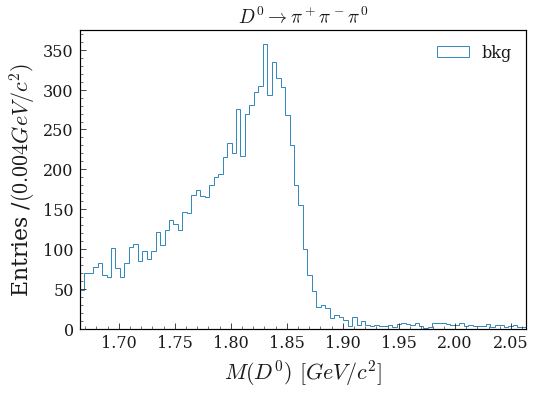

one bin's size is 1.1998414993286133e-05


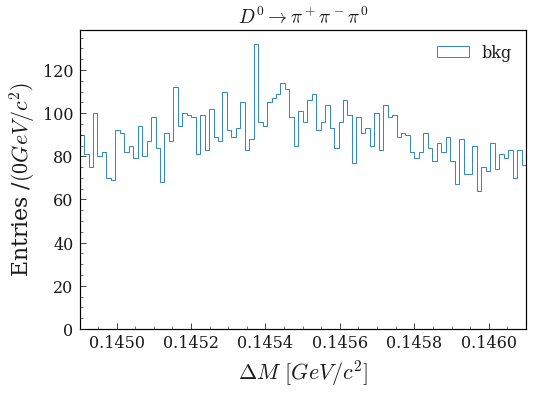

one bin's size is 0.0199992411973233


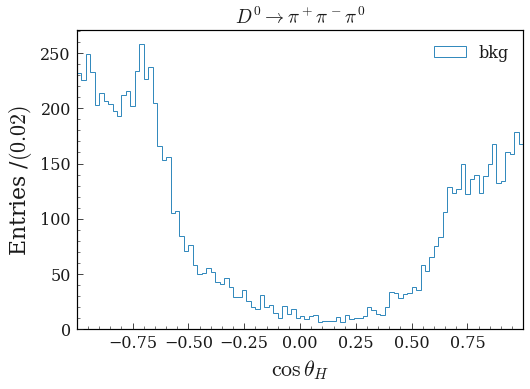

<Figure size 576x396 with 0 Axes>

input_line_92:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [7]:
var_name={}
var_name["D0_M"]="M(D^0)"
var_name["Dstarp_delM"]="\Delta M"
#var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
var_unit["Dstarp_delM"]="GeV/c^2"
#var_unit["cos_dalitz_pip"]=""
var_unit["D0_cosHel_0"]=""

bins=100
#plot_title=r"$\rho^0$ mode"
plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0$"

file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6.root'
tree='rho'
base_filter='(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) && (Dstarp_CMS_p>2.72) && (abs(Dstarp_Q-0.00593)<0.0006)'
true_filter='&& (Dstarp_isSignal==1)'
false_filter='&& (Dstarp_isSignal!=1)'

Draw(var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

['D0_M', 'Dstarp_delM', 'cos_dalitz_pip']
# of false is 245
one bin's size is 0.003968628644943237


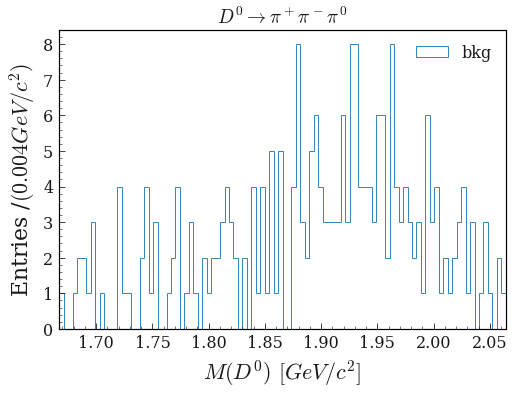

one bin's size is 1.1899471282958984e-05


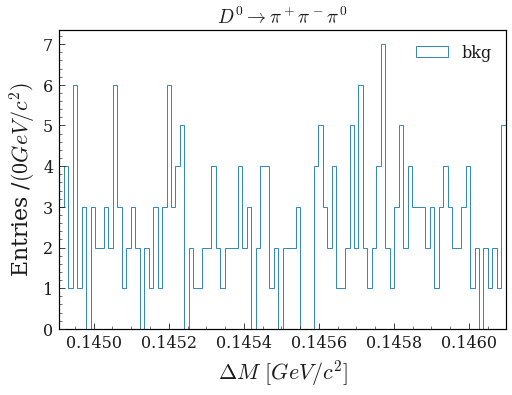

one bin's size is 0.019821125426331253


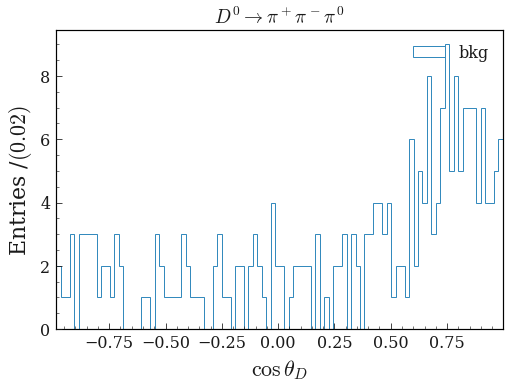

<Figure size 576x396 with 0 Axes>

In [9]:
var_name={}
var_name["D0_M"]="M(D^0)"
var_name["Dstarp_delM"]="\Delta M"
var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
#var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
var_unit["Dstarp_delM"]="GeV/c^2"
var_unit["cos_dalitz_pip"]=""
#var_unit["D0_cosHel_0"]=""

bins=100
#plot_title=r"$\rho^0$ mode"
plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0$"

file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6.root'
tree='omega'
base_filter='(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Omega_M- 0.78265) < 0.015 ) && \
Dstarp_CMS_p>2.7 && abs(Dstarp_Q-0.00593)<0.0006'
true_filter='&& (Dstarp_isSignal==1)'
false_filter='&& (Dstarp_isSignal!=1)'

Draw(var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

In [ ]:
var_name={}
var_name["D0_M"]="M(D^0)"
var_name["Dstarp_delM"]="\Delta M"
var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
#var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
var_unit["Dstarp_delM"]="GeV/c^2"
var_unit["cos_dalitz_pip"]=""
#var_unit["D0_cosHel_0"]=""

bins=100
#plot_title=r"$\rho^0$ mode"
plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0$"

file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6_gen.root'
tree='omega'
base_filter=''

Draw(var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

# D to Pip Pim 2 Pi0

['D0_M', 'Dstarp_delM', 'cos_dalitz_pip']
# of false is 472
one bin's size is 0.003969055414199829


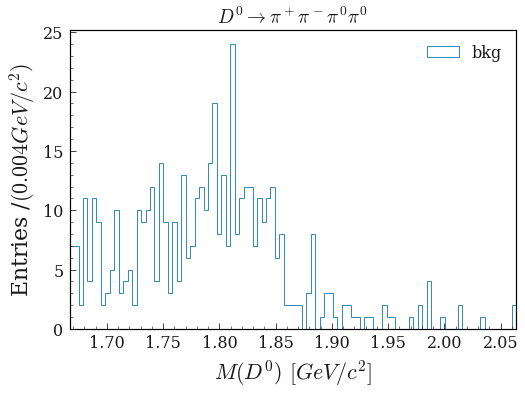

one bin's size is 1.1878013610839844e-05


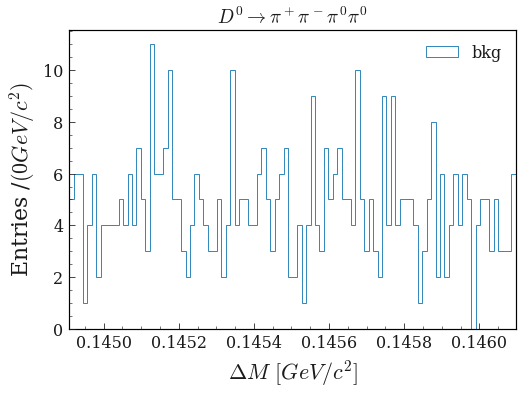

one bin's size is 0.01996187133423356


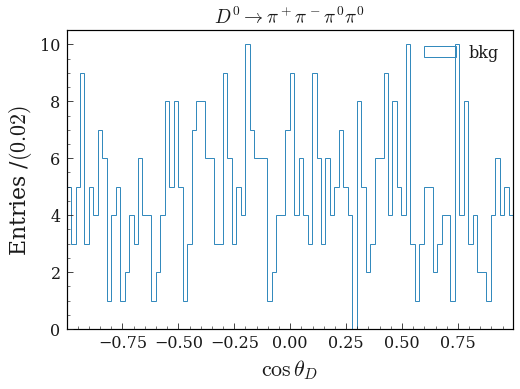

<Figure size 576x396 with 0 Axes>

In [10]:
var_name={}
var_name["D0_M"]="M(D^0)"
var_name["Dstarp_delM"]="\Delta M"
var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
#var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
var_unit["Dstarp_delM"]="GeV/c^2"
var_unit["cos_dalitz_pip"]=""
#var_unit["D0_cosHel_0"]=""

bins=100
plot_title=r"$\rho^0$ mode"
plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0 \pi^0$"

file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippim2pi0/ntuple/recon_mdst_e6.root'
tree='omega'
base_filter='(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Omega_M- 0.78265) < 0.015 ) && \
Dstarp_CMS_p>2.7 && abs(Dstarp_Q-0.00593)<0.0006'
true_filter='&& (Dstarp_isSignal==1)'
false_filter='&& (Dstarp_isSignal!=1)'

Draw(var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

# D to omega Pi0

['D0_M', 'Dstarp_delM', 'cos_dalitz_pip']
# of false is 10620
one bin's size is 0.003997937440872192


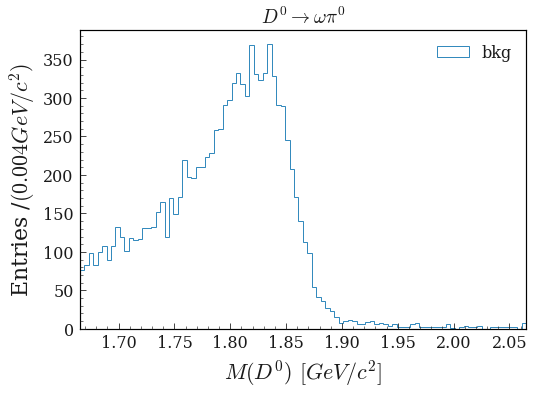

one bin's size is 1.1993646621704101e-05


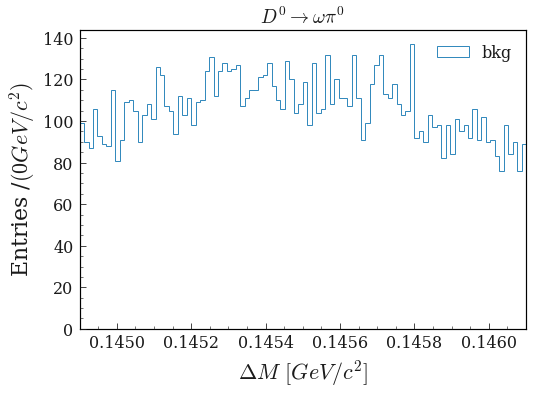

one bin's size is 0.019829354445993704


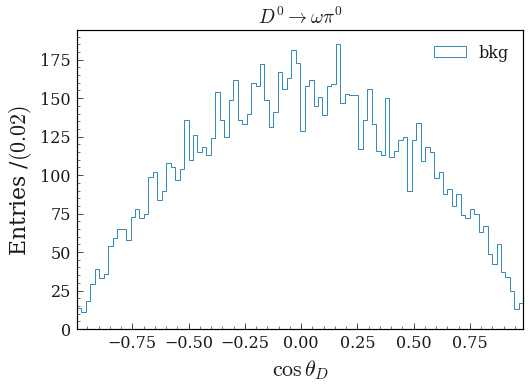

<Figure size 576x396 with 0 Axes>

In [11]:
var_name={}
var_name["D0_M"]="M(D^0)"
var_name["Dstarp_delM"]="\Delta M"
var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
#var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
var_unit["Dstarp_delM"]="GeV/c^2"
var_unit["cos_dalitz_pip"]=""
#var_unit["D0_cosHel_0"]=""

bins=100
plot_title=r"$\rho^0$ mode"
plot_title=r"$D^0 \rightarrow \omega \pi^0$"

file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2omegapi0/ntuple/recon_mdst_e6.root'
tree='omega'
base_filter='(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Omega_M- 0.78265) < 0.015 ) && \
  Dstarp_CMS_p>2.7 && abs(Dstarp_Q-0.00593)<0.0006'
true_filter='&& (Dstarp_isSignal==1)'
false_filter='&& (Dstarp_isSignal!=1)'

Draw(var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

# D to omega eta

['D0_M', 'Dstarp_delM', 'cos_dalitz_pip']
# of false is 1369
one bin's size is 0.0038916945457458498


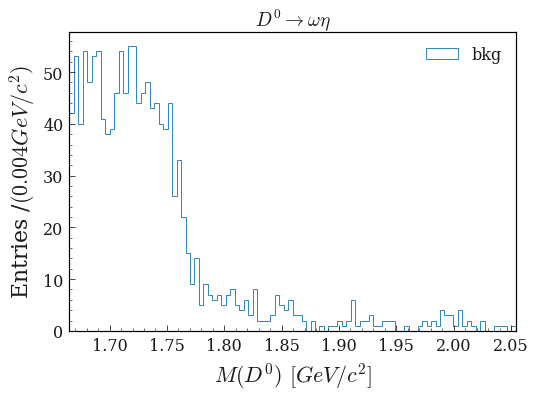

one bin's size is 1.1990070343017578e-05


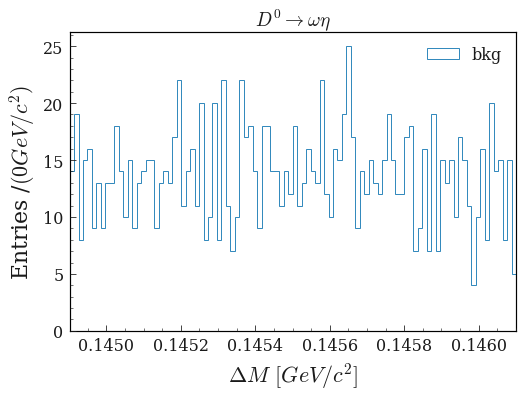

one bin's size is 0.019850821351211908


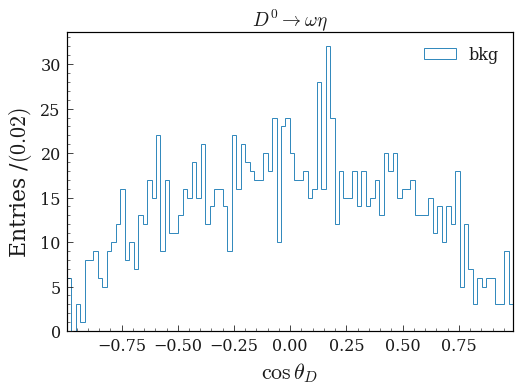

<Figure size 576x396 with 0 Axes>

In [12]:
var_name={}
var_name["D0_M"]="M(D^0)"
var_name["Dstarp_delM"]="\Delta M"
var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
#var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
var_unit["Dstarp_delM"]="GeV/c^2"
var_unit["cos_dalitz_pip"]=""
#var_unit["D0_cosHel_0"]=""

bins=100
plot_title=r"$D^0 \rightarrow \omega \eta$"

file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2omegaeta/ntuple/recon_mdst_e6.root'
tree='omega'
base_filter='(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Omega_M- 0.78265) < 0.015 ) && \
  Dstarp_CMS_p>2.7 && abs(Dstarp_Q-0.00593)<0.0006 '
true_filter='&& (Dstarp_isSignal==1)'
false_filter='&& (Dstarp_isSignal!=1)'

Draw(var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

# D to Pip Pim Pi0 eta

['D0_M', 'Dstarp_delM', 'cos_dalitz_pip']
# of false is 156
one bin's size is 0.0036314547061920164


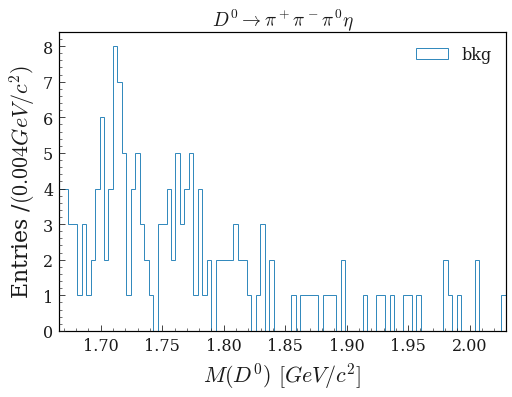

one bin's size is 1.1831521987915039e-05


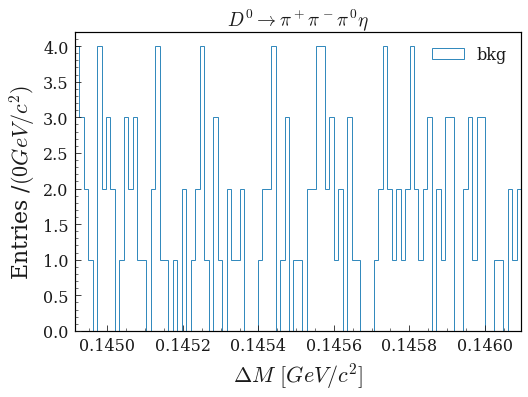

one bin's size is 0.019790249831849044


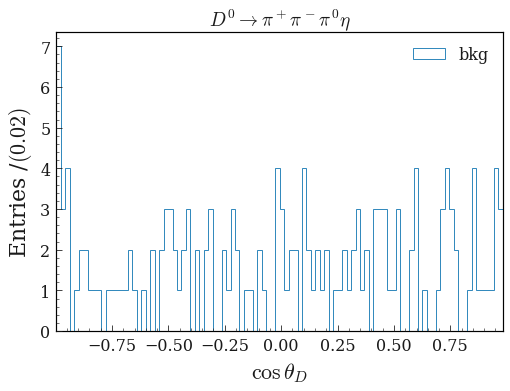

<Figure size 576x396 with 0 Axes>

input_line_84:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
var_name={}
var_name["D0_M"]="M(D^0)"
var_name["Dstarp_delM"]="\Delta M"
var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
#var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
var_unit["Dstarp_delM"]="GeV/c^2"
var_unit["cos_dalitz_pip"]=""
#var_unit["D0_cosHel_0"]=""

bins=100
plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0 \eta$"

file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0eta/ntuple/recon_mdst_e6.root'
tree='omega'
base_filter='(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Omega_M- 0.78265) < 0.015 ) && \
  Dstarp_CMS_p>2.7 && abs(Dstarp_Q-0.00593)<0.0006 '
true_filter='&& (Dstarp_isSignal==1)'
false_filter='&& (Dstarp_isSignal!=1)'

Draw(var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

AttributeError: 'CartesianAxesSubplot' object has no attribute '_shared_y_axes'

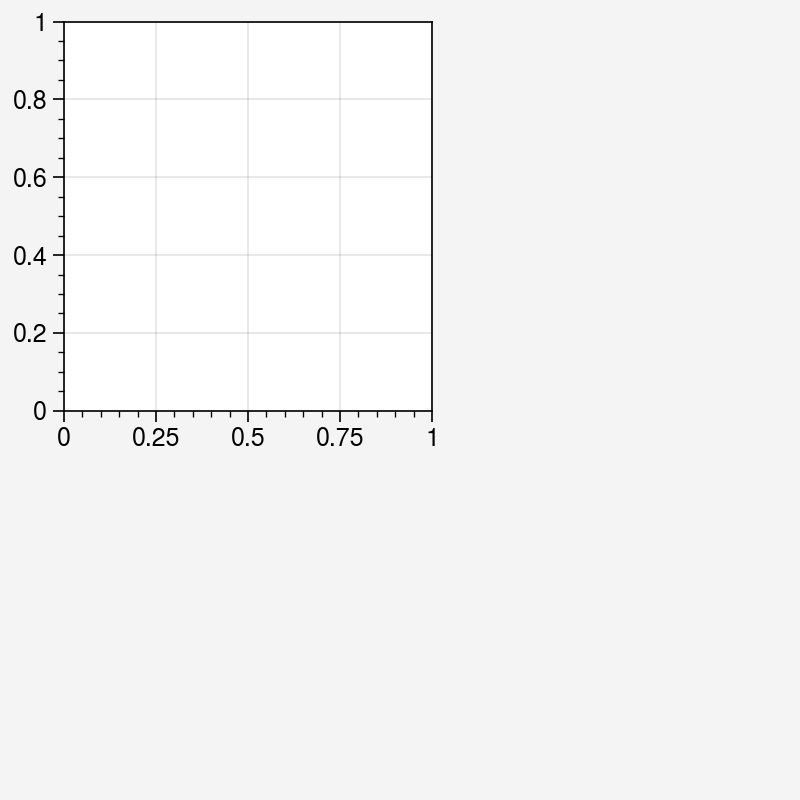

In [43]:
import proplot as pplt
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data = 10 + state.normal(0, 1, size=(33, 33)).cumsum(axis=0).cumsum(axis=1)

# Figure
fig, axs = pplt.subplots([[1, 1, 2, 2], [0, 3, 3, 0]], ref=3, refwidth=2.3)
axs.format(yformatter='none', suptitle='Discrete vs. smooth colormap levels')

# Pcolor
axs[0].pcolor(data, cmap='viridis', colorbar='l')
axs[0].set_title('Pcolor plot\ndiscrete=True (default)')
axs[1].pcolor(data, discrete=False, cmap='viridis', colorbar='r')
axs[1].set_title('Pcolor plot\ndiscrete=False')


# ETC

In [3]:
def get_data(file='file', figname='name', tree='tree', base_filter=None,variables=None):
    
    tree=tree
    f = file
    base_filter  = base_filter    
    
    ROOT_df_start = ROOT.RDataFrame(tree, f)  
    col_dict  = ROOT_df_start.AsNumpy(variables)
    
    if base_filter !=None:
        ROOT_df_filtered  = ROOT_df_start.Filter(base_filter)                            
        col_dict  = ROOT_df_filtered.AsNumpy(variables)
    
    pd_df  = pd.DataFrame(col_dict)
    
    
    return pd_df

In [9]:
def compute(row):
    
    E = row['pip_E'] + row['pim_E']
    px = row['pip_px'] + row['pim_px']
    py = row['pip_py'] + row['pim_py']
    pz = row['pip_pz'] + row['pim_pz']
    
    InvM = math.sqrt(E*E - (px*px + py*py + pz*pz))
    
    return InvM

In [10]:
file = '/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6_gen.root'
file = '/home/jykim/nas/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6_gen.root'
tree = 'Dstar'
base_filter = '()'
variables=['pip_E','pim_E','pip_px','pim_px','pip_py','pim_py','pip_pz','pim_pz']

pd_df = get_data(file=file, tree=tree,variables=variables )

pd_df['pippim'] = pd_df.apply(lambda row: compute(row), axis=1)



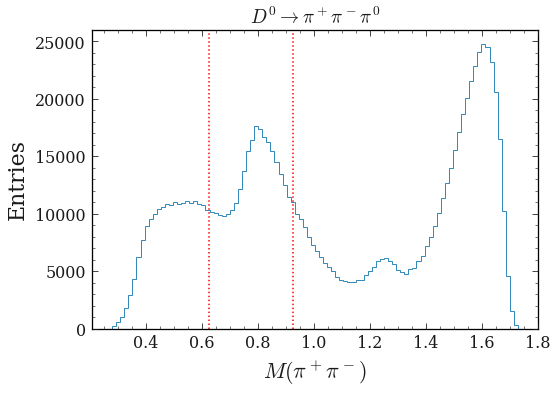

In [11]:
plt.hist(pd_df['pippim'], label=r'bkg',bins=100,  histtype='step') 

plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0$"
plt.title(plot_title)
ax = plt.gca()
xlabel = r"$M(\pi^+\pi^-)$"
ax.set_xlabel(xlabel)
ax.set_ylabel('Entries')

plt.axvline(x=0.92526,  color='red', linestyle='dotted')
plt.axvline(x=0.62526,  color='red', linestyle='dotted')

In [34]:
def compute_2(row):
    
    E = row['pip_E'] + row['pi0_E']
    px = row['pip_px'] + row['pi0_px']
    py = row['pip_py'] + row['pi0_py']
    pz = row['pip_pz'] + row['pi0_pz']
    
    InvM = math.sqrt(E*E - (px*px + py*py + pz*pz))
    
    return InvM




In [35]:
file = '/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6_gen.root'
tree = 'Dstar'
base_filter = '()'
variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']

pd_df = get_data(file=file, tree=tree,variables=variables )

pd_df['pippi0'] = pd_df.apply(lambda row: compute_2(row), axis=1)

Text(0, 0.5, 'Entries')

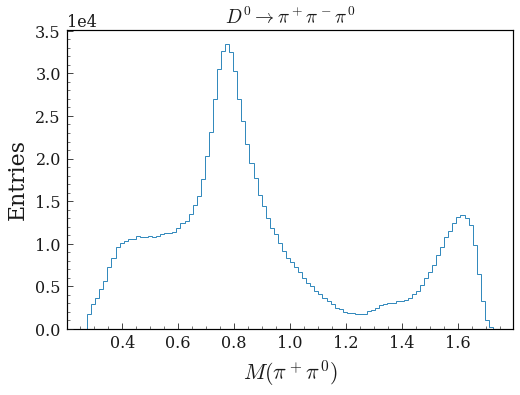

In [36]:
plt.hist(pd_df['pippi0'], label=r'bkg',bins=100,  histtype='step') 

plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0$"
plt.title(plot_title)
ax = plt.gca()
xlabel = r"$M(\pi^+\pi^0)$"
ax.set_xlabel(xlabel)
ax.set_ylabel('Entries')

In [40]:
def compute_3(row):
    
    E = row['pim_E'] + row['pi0_E']
    px = row['pim_px'] + row['pi0_px']
    py = row['pim_py'] + row['pi0_py']
    pz = row['pim_pz'] + row['pi0_pz']
    
    InvM = math.sqrt(E*E - (px*px + py*py + pz*pz))
    
    return InvM


In [41]:
file = '/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6_gen.root'
tree = 'Dstar'
base_filter = '()'
variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']

pd_df = get_data(file=file, tree=tree,variables=variables )

pd_df['pimpi0'] = pd_df.apply(lambda row: compute_3(row), axis=1)

Text(0, 0.5, 'Entries')

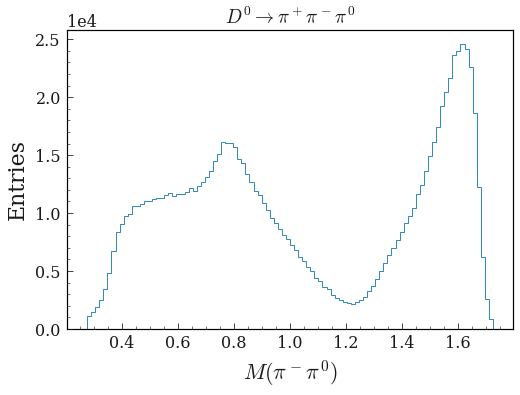

In [42]:
file = '/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6_gen.root'
tree = 'Dstar'
base_filter = '()'
variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']

pd_df = get_data(file=file, tree=tree,variables=variables )

pd_df['pippi0'] = pd_df.apply(lambda row: compute_3(row), axis=1)

In [ ]:
plt.hist(pd_df['pimpi0'], label=r'bkg',bins=100,  histtype='step') 

plot_title=r"$D^0 \rightarrow \pi^+ \pi^- \pi^0$"
plt.title(plot_title)
ax = plt.gca()
xlabel = r"$M(\pi^-\pi^0)$"
ax.set_xlabel(xlabel)
ax.set_ylabel('Entries')

In [33]:
def compute_4(row):
    
    E = row['km_E'] + row['pip_E']
    px = row['km_px'] + row['pip_px']
    py = row['km_py'] + row['pip_py']
    pz = row['km_pz'] + row['pip_pz']
    
    InvM = math.sqrt(E*E - (px*px + py*py + pz*pz))
    
    return InvM

In [34]:
file = '/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/D2kmpippi0/ntuple/recon_mdst_e6_gen.root'
tree = 'Dstar'
base_filter = '()'
variables=['km_E','pip_E','pi0_E','km_px','pip_px','pi0_px','km_py','pip_py','pi0_py','km_pz','pip_pz','pi0_pz']

pd_df = get_data(file=file, tree=tree,variables=variables )
pd_df

pd_df['kmpip'] = pd_df.apply(lambda row: compute_4(row), axis=1)

AttributeError: 'NoneType' object has no attribute 'apply'

In [15]:
pd_df.describe()

,km_E,pip_E,pi0_E,km_px,pip_px,pi0_px,km_py,pip_py,pi0_py,km_pz,pip_pz,pi0_pz,kmpip
count,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06,1.013469e+06
mean,1.520410e+00,9.947091e-01,9.319040e-01,6.173797e-02,4.036635e-02,3.909051e-02,1.965022e-03,5.490744e-04,1.979442e-04,4.073280e-01,2.664729e-01,2.491953e-01,1.218365e+00
std,7.633399e-01,7.320945e-01,7.092343e-01,8.496642e-01,6.454707e-01,6.109240e-01,8.487881e-01,6.435787e-01,6.112169e-01,1.019076e+00,7.761869e-01,7.367494e-01,3.558845e-01
min,4.937252e-01,1.395901e-01,1.349864e-01,-3.992048e+00,-3.548537e+00,-3.602034e+00,-4.064255e+00,-3.854120e+00,-3.718095e+00,-3.180547e+00,-3.009475e+00,-2.871233e+00,6.332627e-01
25%,9.196051e-01,4.358746e-01,3.992524e-01,-4.328563e-01,-2.631311e-01,-2.396727e-01,-4.857368e-01,-2.947440e-01,-2.699271e-01,-2.492051e-01,-1.491822e-01,-1.366551e-01,8.970488e-01
50%,1.348511e+00,7.698474e-01,7.034124e-01,4.613004e-02,2.257739e-02,2.067991e-02,1.676118e-03,3.848089e-04,3.888495e-04,2.829406e-01,1.404042e-01,1.284762e-01,1.191014e+00
75%,1.955163e+00,1.368317e+00,1.273323e+00,5.434125e-01,3.284163e-01,3.020218e-01,4.898798e-01,2.960292e-01,2.708200e-01,9.698400e-01,5.718807e-01,5.255739e-01,1.579574e+00
max,5.922090e+00,5.103679e+00,5.243852e+00,4.547974e+00,3.914903e+00,4.000887e+00,4.198672e+00,3.848886e+00,3.722734e+00,5.834254e+00,4.920674e+00,5.020322e+00,1.729747e+00


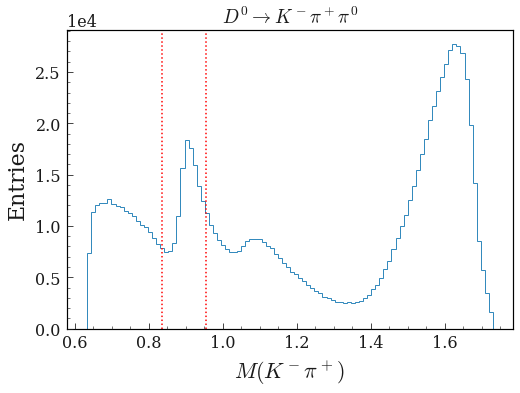

In [11]:
plt.hist(pd_df['kmpip'], label=r'bkg',bins=100,  histtype='step') 

plot_title=r"$D^0 \rightarrow K^- \pi^+ \pi^0$"
plt.title(plot_title)
ax = plt.gca()
xlabel = r"$M(K^-\pi^+)$"
ax.set_xlabel(xlabel)
ax.set_ylabel('Entries')

plt.axvline(x=0.95555,  color='red', linestyle='dotted')
plt.axvline(x=0.83555,  color='red', linestyle='dotted')



In [26]:
var_name={}
var_name["D0_M"]="M(D^0)"
#var_name["Pi0_Prob"]="Pi0_Prob"
#var_name["Dstarp_delM"]="\Delta M"
#var_name["cos_dalitz_pip"]=r"\cos\theta_{D}"
#var_name["D0_cosHel_0"]=r"\cos\theta_{H}"

var_unit={}
var_unit["D0_M"]="GeV/c^2"
#var_unit["Pi0_Prob"]="Pi0_Prob"
#var_unit["Dstarp_delM"]="GeV/c^2"
#var_unit["cos_dalitz_pip"]=""
#var_unit["D0_cosHel_0"]=""

bins=100
#plot_title=r"$\rho^0$ mode"
plot_title=r"$test$"

file='/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'

file='/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged//train_v1_yes_signal_charged_recon_output_02.root'
tree='phi'
base_filter=''
true_filter=''
false_filter=''

Draw(option='on',var_name=var_name, var_unit=var_unit, file=file, tree=tree, base_filter=base_filter, true_filter=true_filter, false_filter=false_filter,bins=bins)

['D0_M']


runtime_error: const vector<double>& ROOT::RDF::RResultPtr<vector<double> >::GetValue() =>
    runtime_error: 
An error occurred during just-in-time compilation in RLoopManager::Run. The lines above might indicate the cause of the crash
All RDF objects that have not run their event loop yet should be considered in an invalid state.


In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/input_line_9:15:
In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/etc/dictpch/allHeaders.h:561:
In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/include/ROOT/RCsvDS.hxx:14:
In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/include/ROOT/RDataFrame.hxx:20:
In file included from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/include/ROOT/RDF/RInterface.hxx:18:
/cvmfs/belle.cern.ch/el7/externals/v01-11-00/build/Linux_x86_64/common/root/include/ROOT/RDF/InterfaceUtils.hxx:388:42: error: no member named 'list_size' in 'ROOT::TypeTraits::TypeList<>'
   constexpr auto nColumns = ColTypes_t::list_size;
                             ~~~~~~~~~~~~^
input_line_174:2:23: note: in instantiation of function template specialization 'RO

In [4]:
def get_data(file='file', figname='name', tree='tree', base_filter=None,variables=None):
    
    tree=tree
    f = file
    base_filter  = base_filter    
    
    ROOT_df_start = ROOT.RDataFrame(tree, f)  
    col_dict  = ROOT_df_start.AsNumpy(variables)
    
    if base_filter !=None:
        ROOT_df_filtered  = ROOT_df_start.Filter(base_filter)                            
        col_dict  = ROOT_df_filtered.AsNumpy(variables)
    
    pd_df  = pd.DataFrame(col_dict)
    
    return pd_df
    
    

In [5]:
Filter = {}
Filter['rho']= ' gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 )&& Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
Filter['omega'] = 'gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Omega_M- 0.78265) < 0.015 ) && Dstarp_CMS_p>2.7 && abs(Dstarp_Q-0.00593)<0.0006 '
Filter['phi'] = 'gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Phi_M- 1.0195) < 0.011 ) && Dstarp_CMS_p>2.42 && abs(Dstarp_Q-0.00593)<0.0006'
Filter['antiKstar']='gamma_E>0.3 && gamma_clusterSecondMoment<=1.5 && (D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(antiKstar_M- 0.89555) < 0.06 )&& Dstarp_CMS_p>2.17 && abs(Dstarp_Q-0.00593)<0.0006'

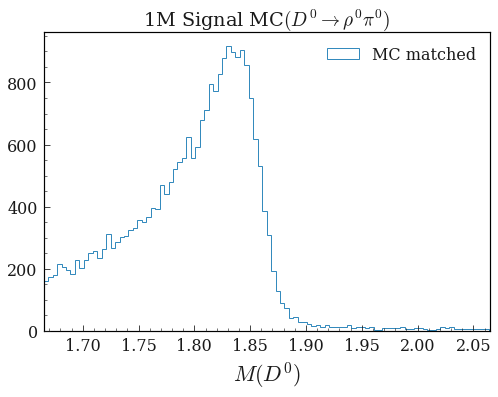

In [8]:
file='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2rhopi0/ntuple/recon_mdst_e6.root'
base_filter='(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 )&& Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'

#base_filter='Dstarp_isSignal==1 && Phi_InvM > 0.9995 && Phi_InvM < 1.0395 '
tree='rho'
variables=['D0_InvM']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['D0_InvM'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(1.665,2.065)    
xlabel = r'$M(D^0)$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \rho^0 \pi^0)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

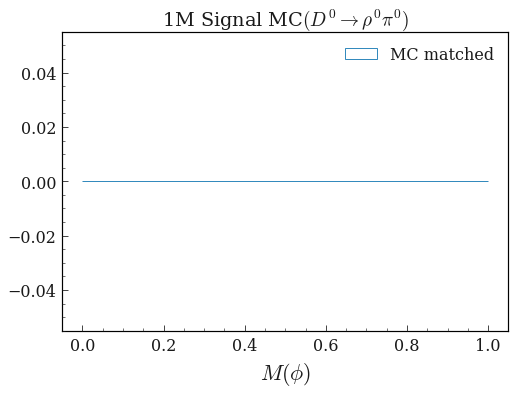

In [7]:
file='/group/belle/users/jaeyoung/storage/01_recon/phi/pid_0_5_signalMC_recon_mdst_phi.root'
base_filter='Dstarp_isSignal==1'
tree='phi'
variables=['Phi_InvM']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['Phi_InvM'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(0.9995,1.0395)    
xlabel = r'$M(\phi)$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \phi \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

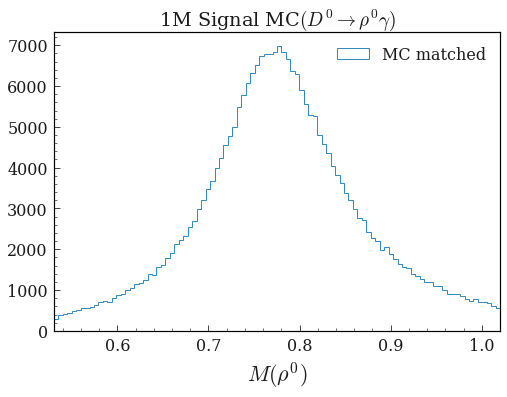

In [26]:
file='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='Dstarp_isSignal==1 && Rho_InvM > 0.53026 && Rho_InvM < 1.02026'
tree='rho'
variables=['Rho_InvM']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['Rho_InvM'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(0.53026, 1.02026)   
xlabel = r'$M(\rho^0)$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \rho^0 \gamma)$'
ax.set_xlabel(xlabel)
#ax.set_xlim(0.5, 1.05) 
plt.title(plot_title)
# plt.axvline(x=1.02026,  color='red', linestyle='dotted')
# plt.axvline(x=0.53026,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

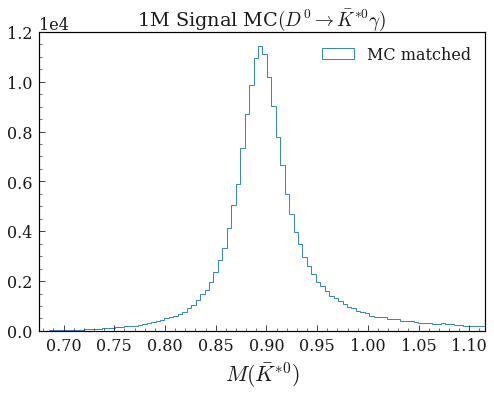

In [25]:
file='/group/belle/users/jaeyoung/storage/01_recon/antiKstar/pid_0_5_signalMC_recon_mdst_antiKstar.root'
base_filter='Dstarp_isSignal==1 && antiKstar_InvM > 0.67555 && antiKstar_InvM < 1.11555'
tree='antiKstar'
variables=['antiKstar_InvM']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['antiKstar_InvM'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(0.67555, 1.11555)   
xlabel = r'$M(\bar{K}^{*0})$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \bar{K}^{*0} \gamma)$'
ax.set_xlabel(xlabel)
#ax.set_xlim(0.5, 1.05) 
plt.title(plot_title)
# plt.axvline(x=1.02026,  color='red', linestyle='dotted')
# plt.axvline(x=0.53026,  color='red', linestyle='dotted')
plt.legend(loc='upper right')


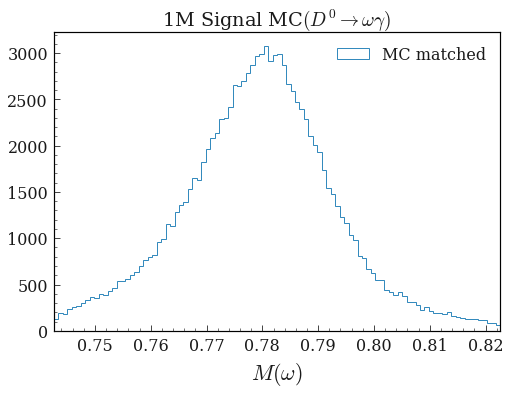

In [24]:
file='/group/belle/users/jaeyoung/storage/01_recon/omega/pid_0_5_signalMC_recon_mdst_omega.root'
base_filter='Dstarp_isSignal==1 && Omega_InvM > 0.74265 && Omega_InvM < 0.82265'
tree='omega'
variables=['Omega_InvM']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['Omega_InvM'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(0.74265, 0.82265)   
xlabel = r'$M(\omega)$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \omega \gamma)$'
ax.set_xlabel(xlabel)
#ax.set_xlim(0.5, 1.05) 
plt.title(plot_title)
# plt.axvline(x=1.02026,  color='red', linestyle='dotted')
# plt.axvline(x=0.53026,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

# gamma 

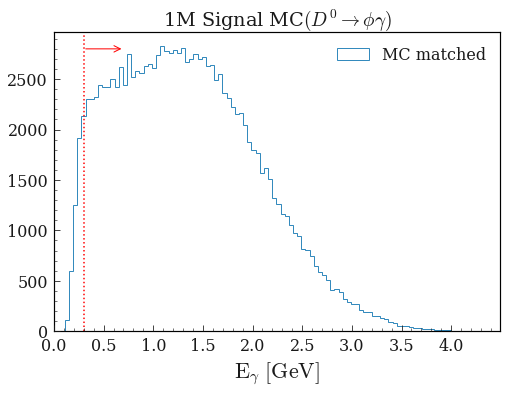

In [12]:
file='/group/belle/users/jaeyoung/storage/01_recon/phi/pid_0_5_signalMC_recon_mdst_phi.root'
base_filter='Dstarp_isSignal==1 '
tree='phi'
variables=['gamma_E']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['gamma_E'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(0,)    
xlabel = r'$\mathrm{E}_{\gamma} \; \mathrm{[GeV]}$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \phi \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
plt.axvline(x=0.3,  color='red', linestyle='dotted')
ax.annotate('', xy=(0.7,2800), xytext=(0.3,2800), arrowprops=dict(arrowstyle="->",color="red"),)
plt.legend(loc='upper right')

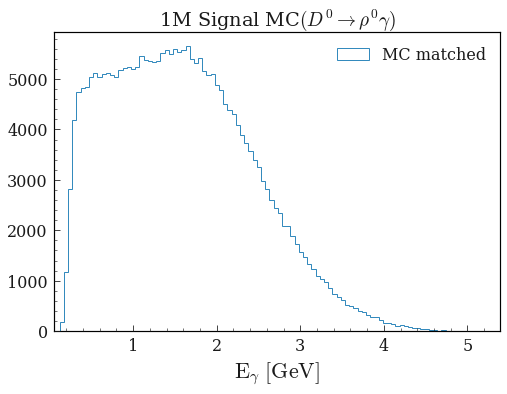

In [44]:
file='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='Dstarp_isSignal==1 '
tree='rho'
variables=['gamma_E']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['gamma_E'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(0.05,)    
xlabel = r'$\mathrm{E}_{\gamma} \; \mathrm{[GeV]}$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \rho^0 \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

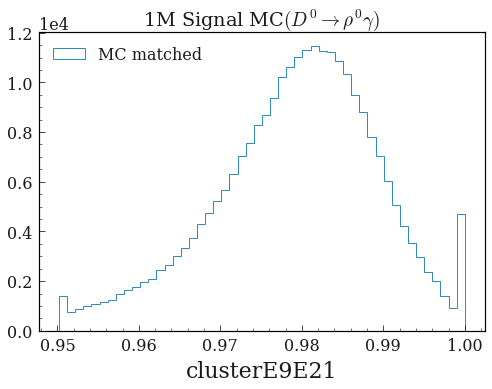

input_line_79:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
file='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='Dstarp_isSignal==1 '
tree='rho'
variables=['gamma_clusterE9E21']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['gamma_clusterE9E21'], label=r'MC matched',bins=50,  histtype='step') 

ax = plt.gca()
#ax.set_xlim(0.05,)    
xlabel = r'clusterE9E21'
plot_title = r'1M Signal MC$(D^0 \rightarrow \rho^0 \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

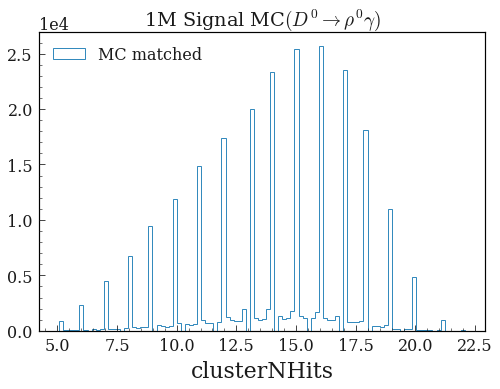

In [43]:
file='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='Dstarp_isSignal==1 '
tree='rho'
variables=['gamma_clusterNHits']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['gamma_clusterNHits'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
#ax.set_xlim(0.05,)    
xlabel = r'clusterNHits'
plot_title = r'1M Signal MC$(D^0 \rightarrow \rho^0 \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')

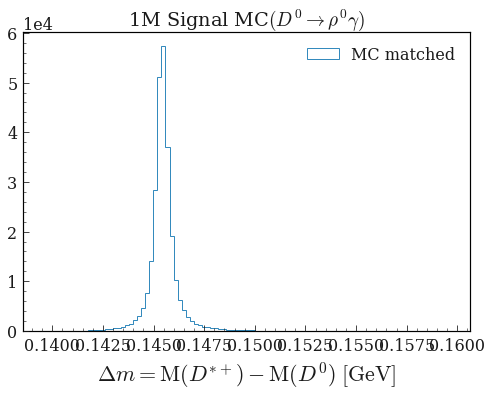

In [47]:
file='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='Dstarp_isSignal==1 '
tree='rho'
variables=['Dstarp_delM']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['Dstarp_delM'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
#ax.set_xlim(0.05,)    
xlabel = r'$\Delta m =\mathrm{M}(D^{*+})-\mathrm{M}(D^0) \; \mathrm{[GeV]}$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \rho^0 \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

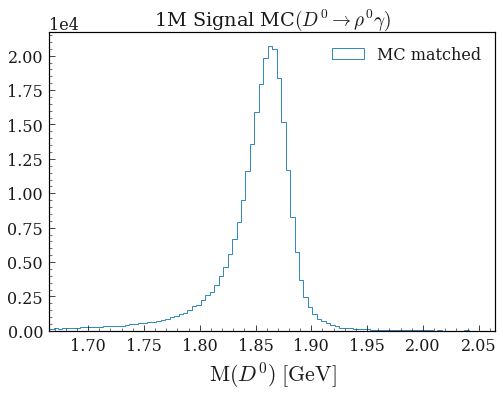

In [50]:
file='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='Dstarp_isSignal==1 && D0_M>1.665 && D0_M<2.065'
tree='rho'
variables=['D0_M']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['D0_M'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(1.665,2.065)    
xlabel = r'$\mathrm{M}(D^0) \; \mathrm{[GeV]}$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \rho^0 \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

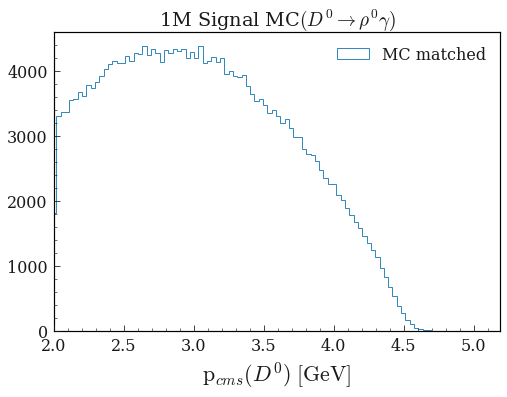

input_line_79:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [5]:
file='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='Dstarp_isSignal==1 && D0_M>1.665 && D0_M<2.065'
tree='rho'
variables=['D0_CMS_p']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['D0_CMS_p'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
ax.set_xlim(2,)    
xlabel = r'$\mathrm{p}_{cms}(D^{0}) \; \mathrm{[GeV]}$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \rho^0 \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

In [ ]:
file='/group/belle/users/jaeyoung/storage/01_recon/phi/pid_0_5_signalMC_recon_mdst_phi.root'
base_filter='Dstarp_isSignal==1'
tree='phi'
variables=['Phi_InvM']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
plt.hist(pd_df['Phi_InvM'], label=r'MC matched',bins=100,  histtype='step') 

ax = plt.gca()
#ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(\phi)$'
plot_title = r'1M Signal MC$(D^0 \rightarrow \phi \gamma)$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.axvline(x=1.0395,  color='red', linestyle='dotted')
plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')

In [8]:
file ='/home/belle2/jaeyoung/workspace/04_gen/bkg_not_exist/done/D2pippimpi0/ntuple/recon_mdst_e6.root'
file1='/group/belle/users/jaeyoung/storage/01_recon/rho/pid_0_5_signalMC_recon_mdst_rho.root'
base_filter='(D0_M>1.665 && D0_M<2.065) && ( abs(Rho_M- 0.77526) < 0.245 ) && gamma_E>0.55 & Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
#base_filter += '&& (gamma_genMotherPDG==111) && (\Phi_genMotherPDG=421) && (gamma_genMotherID==Phi_genMotherID)'
base_filter1='(Dstarp_isSignal==1) && (D0_M>1.665 && D0_M<2.065) && ( abs(Rho_M- 0.77526) < 0.245 ) && gamma_E>0.55 & Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'


tree='rho'
variables=['D0_M']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
pd_df1 = get_data(file=file1, tree=tree,variables=variables ,base_filter=base_filter)

print(pd_df)
#plt.hist(pd_df['D0_M'], label=r'$D^0 \rightarrow \rho^0(\pi^+ \pi^-) \pi^0$',bins=100,  histtype='step') 
plt.hist(pd_df1['D0_M'], label=r'$D^0 \rightarrow \rho^0(\pi^+ \pi^-) \gamma$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$'
plot_title = '1M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

runtime_error: const vector<double>& ROOT::RDF::RResultPtr<vector<double> >::GetValue() =>
    runtime_error: 
An error occurred during just-in-time compilation in RLoopManager::Run. The lines above might indicate the cause of the crash
All RDF objects that have not run their event loop yet should be considered in an invalid state.


IncrementalExecutor::executeFunction: symbol '_ZN4ROOT8Internal3RDF13CacheLineStepIiEEmv' unresolved while linking [cling interface function]!
You are probably missing the definition of unsigned long ROOT::Internal::RDF::CacheLineStep<int>()
Maybe you need to load the corresponding shared library?
IncrementalExecutor::executeFunction: symbol '_ZSt4moveIRSt10shared_ptrIN4ROOT6Detail3RDF9RNodeBaseEEEONSt16remove_referenceIT_E4typeEOS8_' unresolved while linking [cling interface function]!
You are probably missing the definition of std::remove_reference<std::shared_ptr<ROOT::Detail::RDF::RNodeBase>&>::type&& std::move<std::shared_ptr<ROOT::Detail::RDF::RNodeBase>&>(std::shared_ptr<ROOT::Detail::RDF::RNodeBase>&)
Maybe you need to load the corresponding shared library?
IncrementalExecutor::executeFunction: symbol '_ZSt4fillIN9__gnu_cxx17__normal_iteratorIPySt6vectorIySaIyEEEEiEvT_S7_RKT0_' unresolved while linking [cling interface function]!
You are probably missing the definition of void 

In [10]:
file='/home/belle2/jaeyoung/workspace/06_MVA/my_pi0etaveto/train_v1/etaveto_train.root'
tree='eta'
variables=['M']
base_filter='isSignal==1'
pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
#pd_df1 = get_data(file=file1, tree=tree,variables=variables ,base_filter=base_filter)

print(pd_df)
plt.hist(pd_df['M'], label=r'$D^0 \rightarrow \rho^0(\pi^+ \pi^-) \pi^0$',bins=100,  histtype='step') 
#plt.hist(pd_df1['D0_M'], label=r'$D^0 \rightarrow \rho^0(\pi^+ \pi^-) \gamma$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$'
plot_title = '1M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

SegmentationViolation: const vector<double>& ROOT::RDF::RResultPtr<vector<double> >::GetValue() =>
    SegmentationViolation: segfault in C++; program state was reset

 *** Break *** segmentation violation



There was a crash.
This is the entire stack trace of all threads:

Thread 24 (Thread 0x7fa6fc7c8700 (LWP 226210) "ZMQbg/IO/0"):
#0  0x00007fa923d56fd3 in epoll_wait () from /lib64/libc.so.6
#1  0x00007fa91b069ddf in ?? () from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-68c212d3.so.5.2.4
#2  0x00007fa91b089d99 in ?? () from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-68c212d3.so.5.2.4
#3  0x00007fa91b0b2014 in ?? () from /cvmfs/belle.cern.ch/el7/externals/v01-11-00/Linux_x86_64/common/lib/python3.8/site-packages/zmq/backend/cython/../../../pyzmq.libs/libzmq-68c212d3.so.5.2.4
#4  0x00007fa924736ea5 in start_thread () from /lib64/libpthread.so.0
#5  0x00007fa923d569fd in clone () from /lib64/libc.so.6

Thread 23 (Thread 0x7fa6f3fc7700 (LWP 226209) "ZMQbg/Reaper

In [9]:
#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_02.root'
file = '/home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/topo_pid_0_5_no_signal_ccbar_recon_output_00.root'
tree = 'antiKstar'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#base_filter = '(Dstarp_isSignal==1) && '+ Filter['antiKstar']
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'$\bar{K}^{*0}$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Pi0_Prob" is not in a dataset and is not a custom column been defined.

Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root does not exist
Error in <TFile::TFile>: file /home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root does not exist


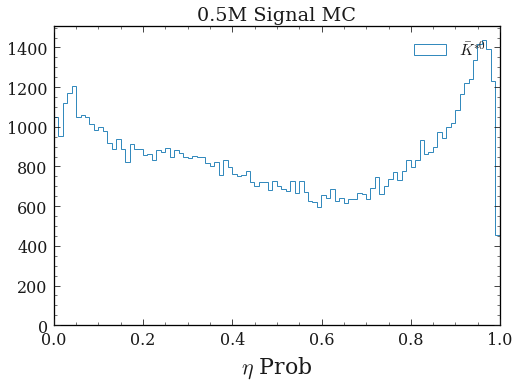

In [42]:
#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_02.root'
file = '/home/jykim/nas/storage/01_recon/antiKstar/expert_signalMC_recon_mdst_antiKstar.root'
#file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/topo_pid_0_5_no_signal_ccbar_recon_output_00.root'
tree = 'antiKstar'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#base_filter = 'Dstarp_isSignal==1 && ' + Filter['antiKstar']
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Eta_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Eta_Prob'], label=r'$\bar{K}^{*0}$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\eta$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

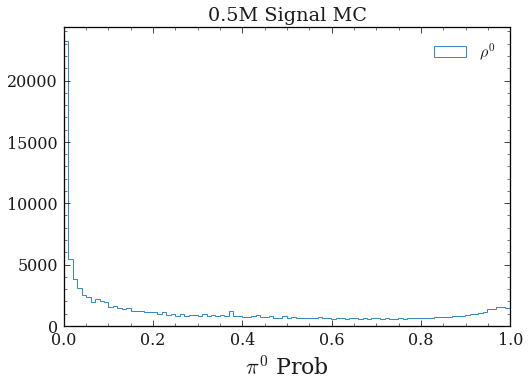

In [25]:
file = '/home/jykim/nas/storage/01_recon/rho/expert_signalMC_recon_mdst_rho.root'
tree = 'rho'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'$\rho^0$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

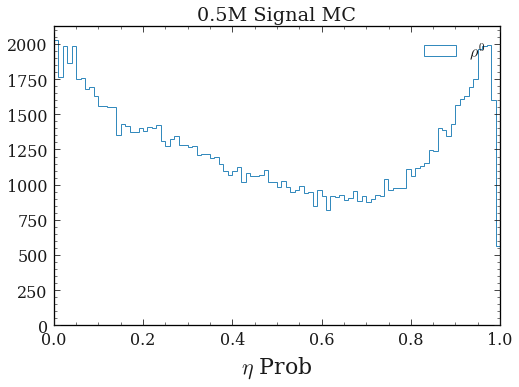

In [43]:
file = '/home/jykim/nas/storage/01_recon/rho/expert_signalMC_recon_mdst_rho.root'
tree = 'rho'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Eta_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Eta_Prob'], label=r'$\rho^0$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\eta$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

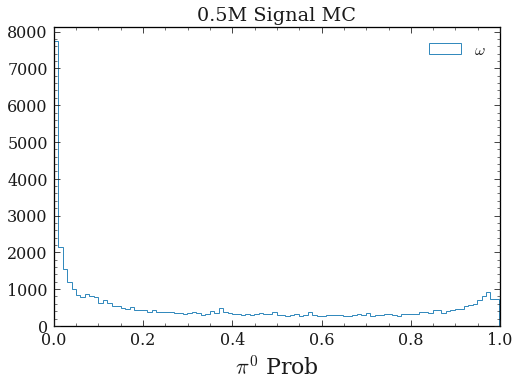

In [28]:
file = '/home/jykim/nas/storage/01_recon/omega/expert_signalMC_recon_mdst_omega.root'
tree = 'omega'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'$\omega$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

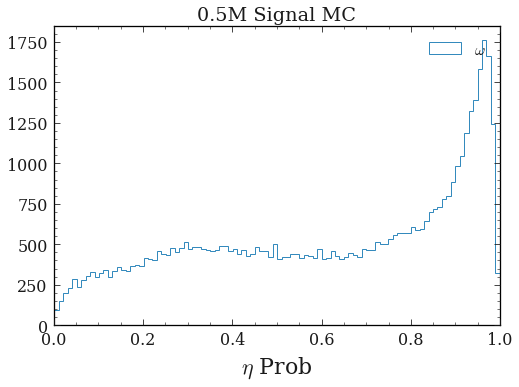

In [44]:
file = '/home/jykim/nas/storage/01_recon/omega/expert_signalMC_recon_mdst_omega.root'
tree = 'omega'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Eta_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Eta_Prob'], label=r'$\omega$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\eta$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

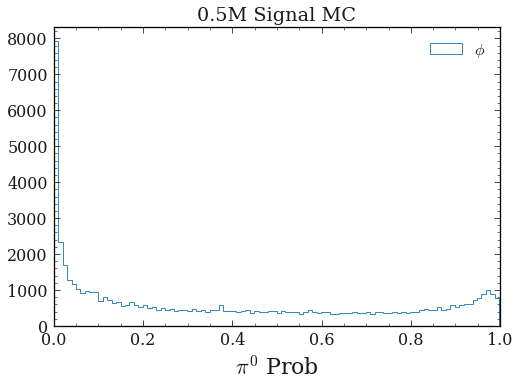

In [29]:
file = '/home/jykim/nas/storage/01_recon/phi/expert_signalMC_recon_mdst_phi.root'
tree = 'phi'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Pi0_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)

plt.hist(pd_df['Pi0_Prob'], label=r'$\phi$',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(0, 1)   
xlabel = r'$\pi^0$ Prob'
plot_title = '0.5M Signal MC'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()

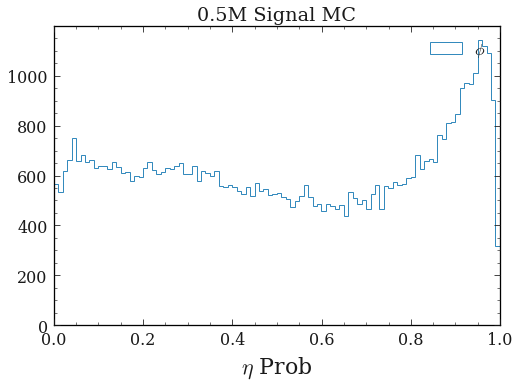

In [45]:
file = '/home/jykim/nas/storage/01_recon/phi/expert_signalMC_recon_mdst_phi.root'
tree = 'phi'
base_filter = 'Dstarp_isSignal==1 && gamma_E>0.3 && gamma_clusterSecondMoment<=1.5'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['Eta_Prob']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)



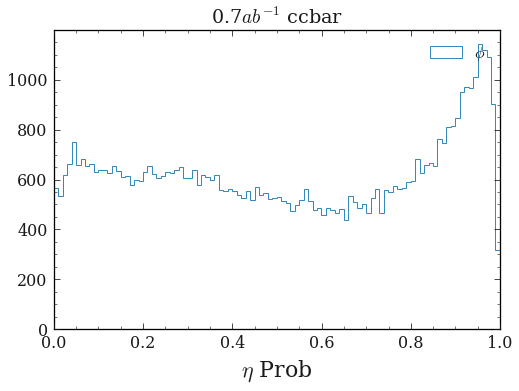